In [1]:
%run ./utilities.ipynb

In [2]:
import csv

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
def findTau(times, position):
    timeList = times.tolist()
    locList = position.tolist()
    a = 1
    ampTimes = []
    ampsUnpro = []
    while timeList[a] < timeList[-1] and timeList[a] > timeList[0]:
        lLoc = locList[a - 1]
        Loc = locList[a]
        nLoc = locList[a + 1]
        if (Loc > lLoc and Loc > nLoc) or (Loc < lLoc and Loc < nLoc):
            ampTimes.append(timeList[a])
            ampsUnpro.append(locList[a])
        a = a + 1;
    
    #Amplitude calculations
    oMidpoint = (ampsUnpro[0] + ampsUnpro[1])/2
    b = 0;
    l = len(ampTimes)
    amps = []
    while b < l:
        amps_el = abs(ampsUnpro[b] - oMidpoint)
        amps.append(amps_el)
        b = b + 1;
    amptarget = amps[0]/ math.exp(1)
    c = 0
    closesttoTarget = 0
    mindistance = 10000000
    closesttoTargetTime = 0
   
    while c < l:
        distoTarget = abs(amptarget - amps[c])
        if distoTarget < mindistance:
            mindistance = distoTarget
            closesttoTargetTime = ampTimes[c]
            closesttoTarget = amps[c]
        c = c + 1
        
    tautime = closesttoTargetTime
    print(amptarget)
    print(closesttoTarget)
    return tautime
    

In [5]:
def importData(filename, xcolname, ycolname):
    data = open(filename, 'r')
    file = csv.DictReader(data)
    xvls = []
    yvls = []
    for col in file:
        xvls.append(col[xcolname])
        yvls.append(col[ycolname])
    l = len(xvls)
    a = 0
    xvals = []
    yvals = []
    while a < l and xvls[a] != '':
        xv = float(xvls[a])
        yv = float(yvls[a])
        xvals.append(xv)
        yvals.append(yv)
        a = a + 1
    times = np.array(xvals)
    position = np.array(yvals)
    print(times)
    return times, position;

In [6]:
def getTaufromfile(filename, xcolname, ycolname):
    times, position = importData(filename, xcolname, ycolname)
    tau = findTau(times, position)
    return tau

In [7]:
##Find uncertainty for a set of three trials
def findUnc(files, xcolname, ycolname):
    tauvals = []
    i = 0
    maxTau = 0
    minTau = 10000
    while i < 3:
        tau = getTaufromfile(files[i], xcolname, ycolname)
        tauvals.append(tau)
        if tau > maxTau:
            maxTau = tau
        elif tau < minTau:
            minTau = tau
        
        i = i + 1
    
    #find uncertainty
    unc = (maxTau - minTau)/2
    
    return unc, tauvals;

In [8]:
## Spring 1 tau calculations and uncertainty calculation
s1files = ['s1t1.csv','s1t2.csv', 's1t3.csv']
s1unc, s1taus = findUnc(s1files, 'time(min)', 'position(m)')

zerol = [0]
stringUncs = zerol * 6
stringTaus = zerol * 6

stringUncs[0] = s1unc
stringTaus[0] = s1taus[0]
print(s1unc)
print(s1taus)


[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 1.99833333e+00
 1.99916667e+00 2.00000000e+00]
0.008030543327574942
0.008013280000000001
[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 1.99833333e+00
 1.99916667e+00 2.00000000e+00]
0.006454930396215302
0.00649352
[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 1.99833333e+00
 1.99916667e+00 2.00000000e+00]
0.005285927253593633
0.005250080000000001
0.04124999999999995
[0.698333333, 0.866666667, 0.784166667]


In [9]:
##Springs 2 and 6 tau and uncertainty calculations
s2files = ['s2t1.csv','s2t2.csv', 's2t3.csv']
s2unc, s2taus = findUnc(s2files, 'time(min)', 'position(m)')

stringUncs[1] = s2unc
stringTaus[1] = s2taus[0]
print(s2unc)
print(s2taus)


s6files = ['s6t1.csv','s6t2.csv', 's6t3.csv']
s6unc, s6taus = findUnc(s6files, 'time(min)', 'position(m)')

stringUncs[5] = s6unc
stringTaus[5] = s6taus[0]
print(s6unc)
print(s6taus)

[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 1.99833333e+00
 1.99916667e+00 2.00000000e+00]
0.00518427480640914
0.00525008
[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 1.99833333e+00
 1.99916667e+00 2.00000000e+00]
0.003659488098641746
0.0035921600000000005
[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 2.00000000e+00
 1.99916667e+00 2.00000000e+00]
0.004116924110971964
0.004008212000000001
0.18224999999999997
[0.741666667, 1.1375, 0.773]
[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 2.00000000e+00
 1.99916667e+00 2.00000000e+00]
0.00020330489436898592
0.0
[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 2.00000000e+00
 1.99916667e+00 2.00000000e+00]
0.004625186346894429
0.004563022000000001
[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 2.00000000e+00
 1.99916667e+00 2.00000000e+00]
0.004066097887379719
0.004139858
0.0040000000000000036
[0.0225, 0.497, 0.489]


In [10]:
print(stringUncs)
print(stringTaus)
a = 0
uncSum = 0
while a < 6:
    uncSum = uncSum + stringUncs[a]
    a = a + 1
avgUnc = uncSum/3


[0.04124999999999995, 0.18224999999999997, 0, 0, 0, 0.0040000000000000036]
[0.698333333, 0.741666667, 0, 0, 0, 0.0225]


In [11]:
var1 = 2
files = ['s3t1.csv', 's4t1.csv', 's5t1.csv']

while var1 < 5:
    tau = getTaufromfile(files[var1 - 2], 'time(min)', 'position(m)')
    stringTaus[var1] = tau
    stringUncs[var1] = avgUnc
    var1 = var1 + 1
print(stringTaus)
print(stringUncs)

[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 2.00000000e+00
 1.99916667e+00 2.00000000e+00]
0.005692537042331605
0.005802719999999999
[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 2.00000000e+00
 1.99916667e+00 2.00000000e+00]
0.011944162544177921
0.012019920000000003
[8.33333000e-04 1.66666700e-03 2.50000000e-03 ... 2.00000000e+00
 1.99916667e+00 2.00000000e+00]
0.006099146831069577
0.006079040000000001
[0.698333333, 0.741666667, 0.935, 0.5, 0.543333333, 0.0225]
[0.04124999999999995, 0.18224999999999997, 0.07583333333333331, 0.07583333333333331, 0.07583333333333331, 0.0040000000000000036]


In [12]:
k_vals = [405, 852, 415, 317, 710, 814]

In [13]:
k_logs = []
tau_logs = []
a = 0
while a < 6:
    k_logs.append(math.log(k_vals[a], 10))
    tau_logs.append(math.log(stringTaus[a], 10))
    a = a + 1
    

Chart Titlek-value vs. Tau
x-axis titlek-Value (N/dm)
y-axis titleTau (min)


<IPython.core.display.Javascript object>


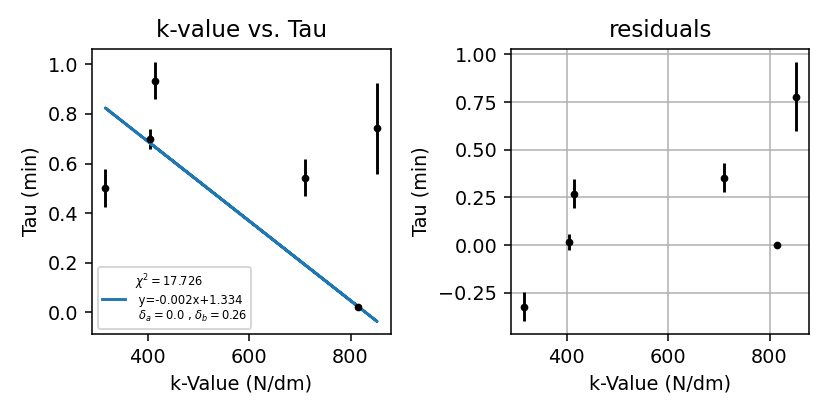

interactive(children=(FloatSlider(value=1.3342149610405305, description='intercept', max=14.342149610405304, m…

[0.69833333 0.74166667 0.935      0.5        0.54333333 0.0225    ]


In [17]:
xvals = np.array(k_vals)
yvals = np.array(stringTaus)
dyvals = np.array(stringUncs)
Title = input('Chart Title')
xaxisTitle = input('x-axis title')
yaxisTitle = input('y-axis title')
autoFit(xvals, yvals, dy=dyvals, title=Title, xaxis=xaxisTitle, yaxis=yaxisTitle)
print(yvals)

Chart Titlelog(k-value) vs. log(Tau)
x-axis titlelog(k-value) (log(N/dm))
y-axis titlelog(Tau) (log(min))


<IPython.core.display.Javascript object>


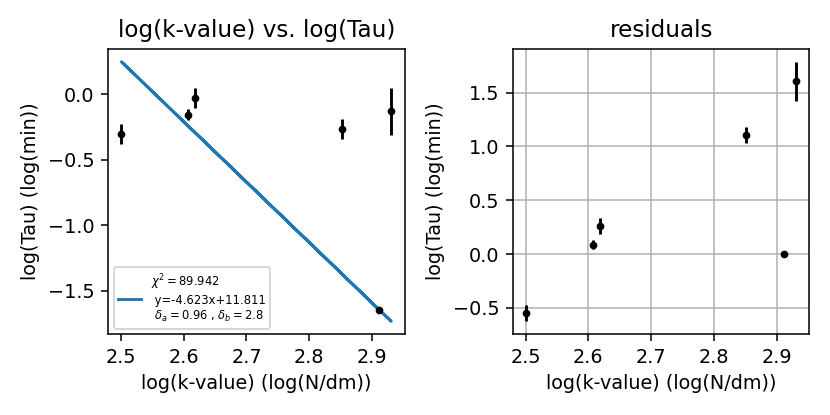

interactive(children=(FloatSlider(value=11.81140564326212, description='intercept', max=119.1140564326212, min…

In [18]:
xvals = np.array(k_logs)
yvals = np.array(tau_logs)
dyvals = np.array(stringUncs)
Title = input('Chart Title')
xaxisTitle = input('x-axis title')
yaxisTitle = input('y-axis title')
autoFit(xvals, yvals, dy=dyvals, title=Title, xaxis=xaxisTitle, yaxis=yaxisTitle)

Chart Titlelog(k-value) vs. Tau
x-axis titlelog(k-value) (log(N/dm))
y-axis titleTau (min)


<IPython.core.display.Javascript object>


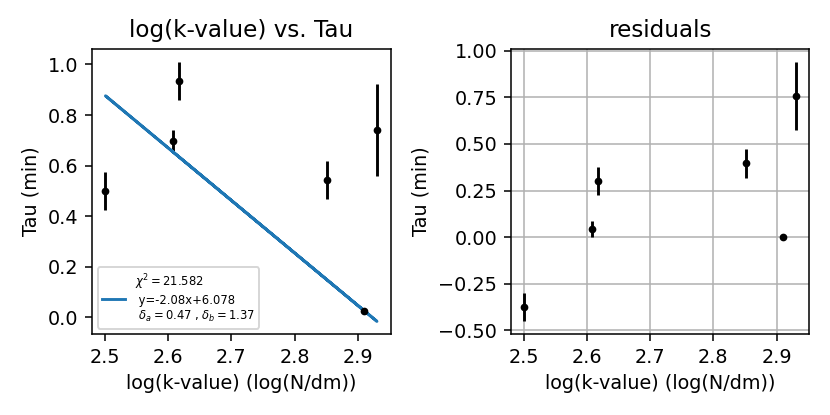

interactive(children=(FloatSlider(value=6.077973700118075, description='intercept', max=61.77973700118075, min…

In [19]:
xvals = np.array(k_logs)
yvals = np.array(stringTaus)
dyvals = np.array(stringUncs)
Title = input('Chart Title')
xaxisTitle = input('x-axis title')
yaxisTitle = input('y-axis title')
autoFit(xvals, yvals, dy=dyvals, title=Title, xaxis=xaxisTitle, yaxis=yaxisTitle)

In [23]:
no6k_vals = k_vals[0:5]
no6taus = stringTaus[0:5]
no6uncs = stringUncs[0:5]
no6klogs = k_logs[0:5]
no6taulogs = tau_logs[0:5]

Chart Titlek-value vs. tau (without spring 6)
x-axis titlek-value (N/dm)
y-axis titletau (min)


<IPython.core.display.Javascript object>


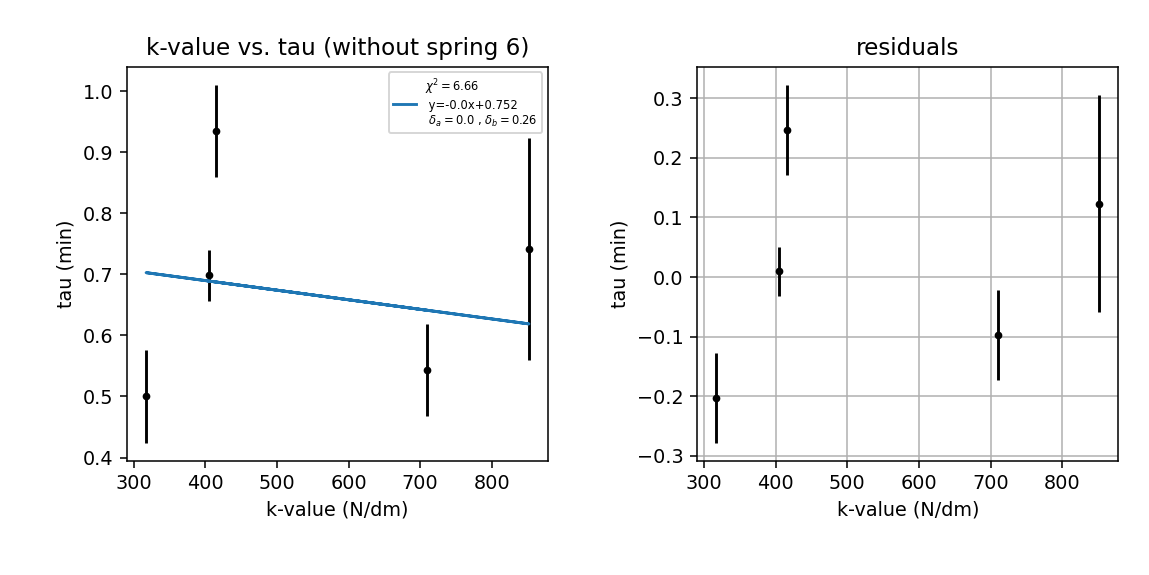

interactive(children=(FloatSlider(value=0.7524877517451979, description='intercept', max=8.52487751745198, min…

In [28]:
xvals = np.array(no6k_vals)
yvals = np.array(no6taus)
dyvals = np.array(no6uncs)
Title = input('Chart Title')
xaxisTitle = input('x-axis title')
yaxisTitle = input('y-axis title')
autoFit(xvals, yvals, dy=dyvals, title=Title, xaxis=xaxisTitle, yaxis=yaxisTitle)

Chart Titlelog(k-value) vs. log(tau) without spring 6
x-axis titlelog(k-value) log(N/dm)
y-axis titlelog(tau) log(min)


<IPython.core.display.Javascript object>


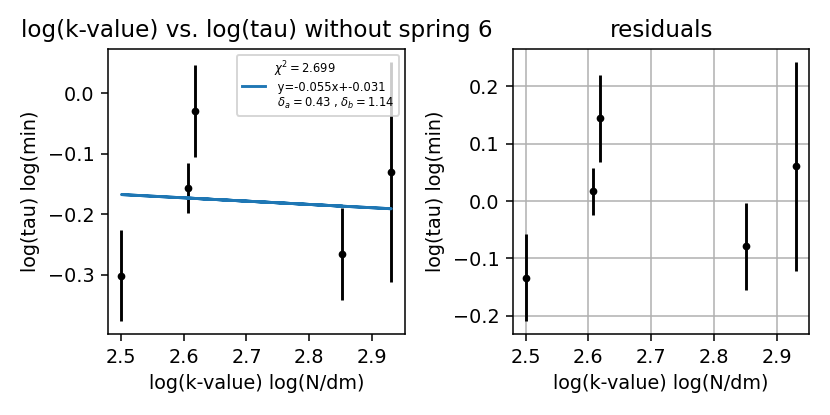

interactive(children=(FloatSlider(value=-0.030597515724798213, description='intercept', max=0.6940248427520179…

In [30]:
xvals = np.array(no6klogs)
yvals = np.array(no6taulogs)
dyvals = np.array(no6uncs)
Title = input('Chart Title')
xaxisTitle = input('x-axis title')
yaxisTitle = input('y-axis title')
autoFit(xvals, yvals, dy=dyvals, title=Title, xaxis=xaxisTitle, yaxis=yaxisTitle)

Chart Titlelog(k-value) vs. tau without spring 6
x-axis titlelog(k-value) log(N/dm)
y-axis titletau (min)


<IPython.core.display.Javascript object>


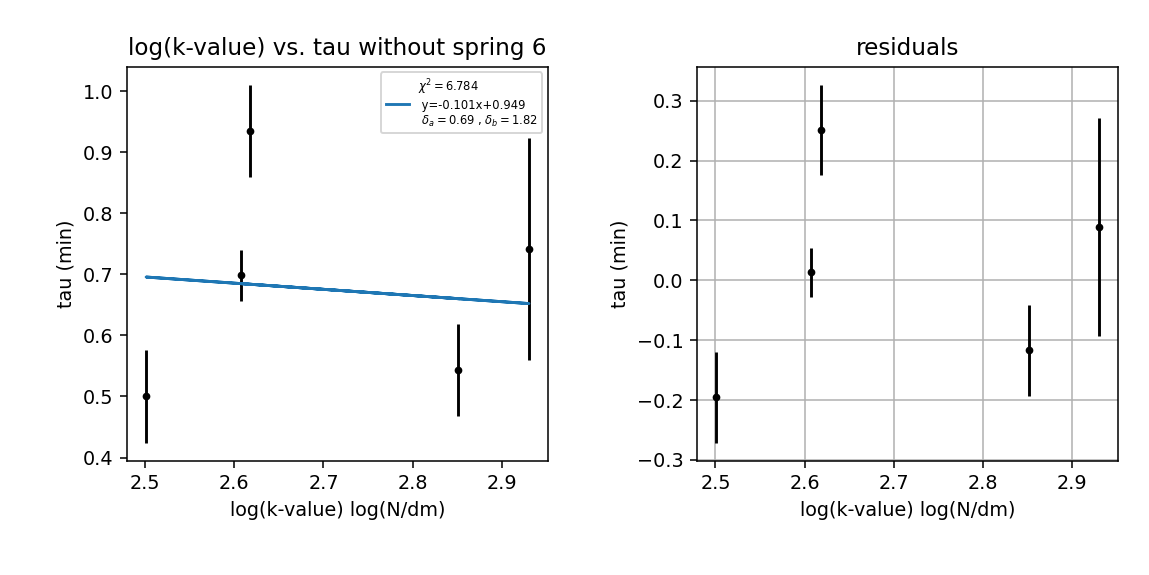

interactive(children=(FloatSlider(value=0.948775909912107, description='intercept', max=10.487759099121071, mi…

In [31]:
xvals = np.array(no6klogs)
yvals = np.array(no6taus)
dyvals = np.array(no6uncs)
Title = input('Chart Title')
xaxisTitle = input('x-axis title')
yaxisTitle = input('y-axis title')
autoFit(xvals, yvals, dy=dyvals, title=Title, xaxis=xaxisTitle, yaxis=yaxisTitle)

In [32]:
print(k_vals)

[405, 852, 415, 317, 710, 814]


In [33]:
print(stringTaus)

[0.698333333, 0.741666667, 0.935, 0.5, 0.543333333, 0.0225]


In [34]:
print(stringUncs)

[0.04124999999999995, 0.18224999999999997, 0.07583333333333331, 0.07583333333333331, 0.07583333333333331, 0.0040000000000000036]
